## 1.数据准备

In [2]:
##导包
import pandas as pd
from pandasql import sqldf
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# 导入数据
bf = pd.read_csv("BlackFriday.csv", header = 'infer')
bf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


<font size=4 face="宋体">数据集共有537577条记录，12个字段，其中User_ID 和Product_ID唯一标识一条记录

In [260]:
bf.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,0.0,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,0.0,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,0.0,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,0.0,0.0,7871


## 2.数据预处理

In [4]:
##处理缺失值
bf.isna().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

<font size=4 face="宋体">Product_Category_2和Product_Category_3返回值为True，只有该2个字段存在缺失值。
<p>而User_ID 和Product_ID不存在缺失值，数据较为完整。
下面，计算缺失值的比率：

In [7]:
missing_percentage = (bf.isnull().sum()/bf.shape[0]*100).sort_values(ascending=False)
missing_percentage = missing_percentage[missing_percentage!=0].round(2)
print(missing_percentage)

Product_Category_3    69.44
Product_Category_2    31.06
dtype: float64


<font size=4 face="宋体">Product_Category_3的缺失值较高，约达70%

In [5]:
#缺失值使用 0 填充
bf.fillna(0,inplace=True)
bf.isna().any().sum()

0

<font size=4 face="宋体">缺失值处理完毕

## 3.初步探索数据

In [ ]:
# 哪些人群更可能在黑色星期五购买更多?
# Q1 性别：男性或女性 + Q4 婚姻状况: 结婚或者结婚  双重pie
# Q2 年龄：哪个年龄段 bar
# Q3 职业 pie
# Q5 居住时间：新居民或老居民 bar
# Q6 城市 pie

### 3.1 查看各数据项的取值

In [13]:
#type(bf)
def data_type(bf):
    for i in bf.columns:
        print(i,"------>>",bf[i].unique())

In [14]:
data_type(bf)

User_ID ------>> [1000001 1000002 1000003 ... 1004113 1005391 1001529]
Product_ID ------>> ['P00069042' 'P00248942' 'P00087842' ... 'P00038842' 'P00295642'
 'P00091742']
Gender ------>> ['F' 'M']
Age ------>> ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Occupation ------>> [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
City_Category ------>> ['A' 'C' 'B']
Stay_In_Current_City_Years ------>> ['2' '4+' '3' '1' '0']
Marital_Status ------>> [0 1]
Product_Category_1 ------>> [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9]
Product_Category_2 ------>> [ 0.  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
Product_Category_3 ------>> [ 0. 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]
Purchase ------>> [ 8370 15200  1422 ... 14539 11120 18426]


<font size=4 face="宋体">可见，年龄段共分成7段，职业分成了21类，城市类型分成3类，居住时间分成了5段。产品类别取值都在0-18之间，视为属于该类别的程度
<p><font size=4 face="宋体"> （如满足什么需求，电脑属于学习类、娱乐类、工作类；衣服：性能（登山、篮球等）、质量（坏-好）、产地（各个国家的代号）。。。）</font>

### 3.2 性别和婚姻状况

In [16]:
## 初步探索数据
# 哪些人群更可能在黑色星期五购买更多?
#Q1 性别：男性或女性+#Q4 婚姻状况: 结婚或者结婚  双重pie

In [20]:
bf_gen_mar = bf.groupby(['Gender','Marital_Status']).count().reset_index('Marital_Status')
bf_gen = bf.groupby(['Gender']).count()

Text(0.5,1,'Gender & Marital_Status')

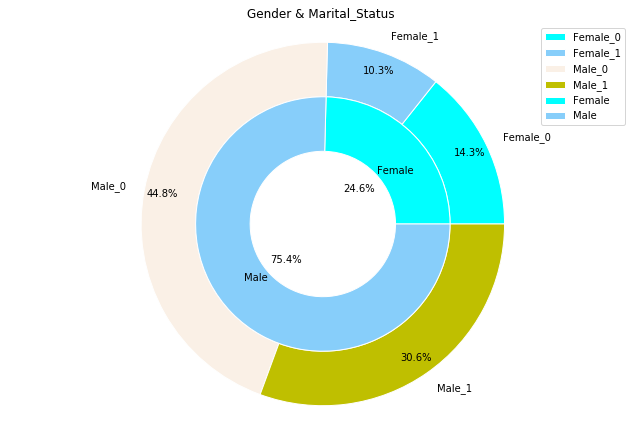

In [22]:
# Female_0,Female_1 中的 "0"代表未婚，"1"代表已婚
plt.figure(figsize=(9,6))
plt.pie(bf_gen_mar.iloc[:,2],radius=1,wedgeprops=dict(width=0.3,edgecolor='w'),colors=['cyan','lightskyblue','linen','y'],labels=['Female_0','Female_1','Male_0','Male_1'],autopct='%1.1f%%',pctdistance = 0.9)
plt.pie(bf_gen.iloc[:,1],radius=0.7,wedgeprops=dict(width=0.3,edgecolor='w'),colors=['cyan','lightskyblue','linen','yellow'],labels=['Female','Male'],labeldistance = 0.6,autopct='%1.1f%%',pctdistance = 0.4)
plt.tight_layout()
plt.legend()
plt.axis('equal')
plt.title('Gender & Marital_Status')

<font size=4 face="宋体">可见，在黑色星期五的销量中，男性特别是未婚男性的购买次数最多。未婚的男女性购买次数相对于已婚都多。

### 3.3 年龄

In [ ]:
## 初步探索数据
# 哪些人群更可能在黑色星期五购买更多?
#Q2 年龄：哪个年龄段

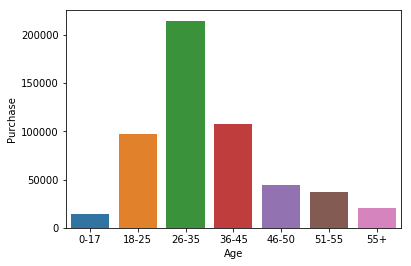

In [61]:
bf_age = bf.groupby(['Age']).count()
sns.barplot(x=bf_age.index,y=bf_age.Purchase)

<font size=4 face="宋体">可见购买的主要群体集中于18-45岁的青中年群体，呈类似正态分布的形式，其中26-35岁的青年团体贡献最大

### 3.4 职业

In [52]:
## 初步探索数据
# 哪些人群更可能在黑色星期五购买更多?
#Q3 职业 pie

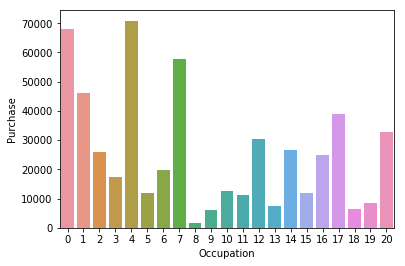

In [63]:
bf_Occ = bf.groupby(['Occupation']).count()
sns.barplot(x=bf_Occ.index,y=bf_Occ.Purchase)

<font size=4 face="宋体">可见，从事职业代号0，4，7的群体购买次数更多，且8，13，18三者最少

### 3.5 居住时间

In [ ]:
## 初步探索数据
# 哪些人群更可能在黑色星期五购买更多?
#Q5 居住时间：新居民或老居民  bar

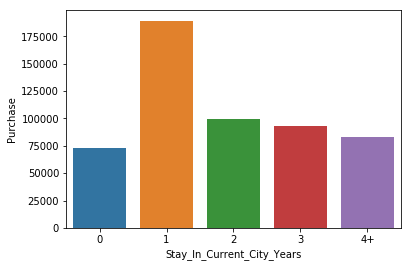

In [72]:
bf_Occ = bf.groupby(['Stay_In_Current_City_Years']).count()
sns.barplot(x=bf_Occ.index,y=bf_Occ.Purchase)

<font size=4 face="宋体">可见，居住一年的群体购买次数更多，其余的居住时间购买次数较相近

### 3.6 城市

In [68]:
## 初步探索数据
# 哪些人群更可能在黑色星期五购买更多?
#Q6 城市 pie

Text(0.5,1,'City')

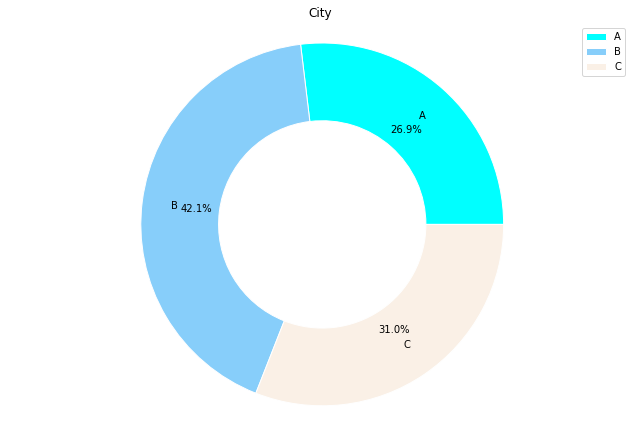

In [80]:
bf_City = bf.groupby(['City_Category']).count()
plt.figure(figsize=(9,6))
plt.pie(bf_City.iloc[:,1],radius=0.7,wedgeprops=dict(width=0.3,edgecolor='w'),colors=['cyan','lightskyblue','linen','yellow'],labels=['A','B','C'],labeldistance = 0.8,autopct='%1.1f%%',pctdistance = 0.7)
plt.tight_layout()
plt.legend()
plt.axis('equal')
plt.title('City')

<font size=4 face="宋体">可见，B城的群体购买次数更多，C城第二，A城最少

## 4.二次探索数据

In [1]:
## 二次探索数据
# 哪种产品在黑色星期五更畅销?（top 10）
# 随着年龄的上升，各类型的产品呈怎样的趋势
# 随着居住时间的上升，各类型的产品呈怎样的趋势
# 哪种类型的产品对于男性和女性（未婚、已婚）来说，需求量更大?
# 不同城市对不同产品的需求

### 4.1 畅销产品

In [92]:
# 哪种产品在黑色星期五更畅销?（top 10）

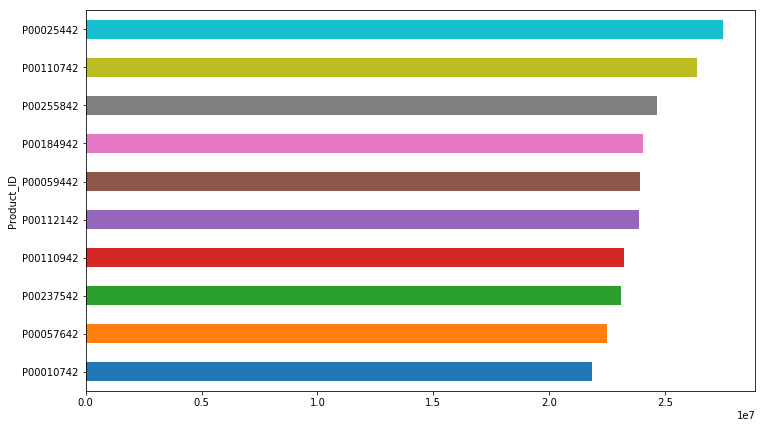

In [91]:
fig1, ax1 = plt.subplots(figsize=(12,7))
bf.groupby('Product_ID')['Purchase'].sum().nlargest(10).sort_values().plot('barh')

### 4.2 年龄与产品类型

In [150]:
## 二次探索数据
##不同人群对不同产品的购买情况
# 随着年龄的上升，各类型的产品呈怎样的趋势

In [166]:
bf_P1=bf.groupby(['Age'])['Purchase'].sum()
bf_P2=bf[bf["Product_Category_2"]>0]
bf_P2=bf_P2.groupby(['Age'])['Purchase'].sum()
bf_P3=bf[bf["Product_Category_3"]>0]
bf_P3=bf_P3.groupby(['Age'])['Purchase'].sum()

No handles with labels found to put in legend.


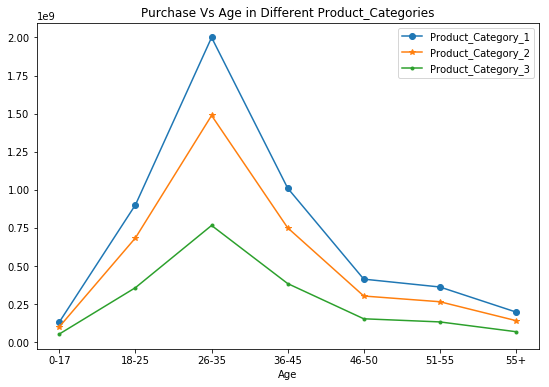

In [170]:
fig=plt.figure(figsize=(9,6));
ax=fig.add_subplot(1,1,1)
ticks=ax.set_xticklabels(['0-17','18-25', '26-35','36-45','46-50','51-55','55+'])
ax.set_title("Purchase Vs Age in Different Product_Categories")
ax.set_xlabel('Age')
ax.legend(loc='best')
ax.plot(bf_P1,marker='o')
ax.plot(bf_P2,marker='*')
ax.plot(bf_P3,marker='.')
ax.legend(['Product_Category_1','Product_Category_2','Product_Category_3'])

<font size=4 face="宋体">可见，在26岁前，随着年龄的上升，对三种产品类型的需求也上升；在35岁后，随着年龄的上升，对三种产品类型的需求也下降。
<p>说明这三种类型的产品的销售对象是青中年人群。

### 4.3 居住时间与产品类型

In [10]:
## 二次探索数据
# 随着居住时间的上升，各类型的产品呈怎样的趋势

In [9]:
bf_S1=bf.groupby(['Stay_In_Current_City_Years'])['Purchase'].sum()

bf_S2=bf[bf["Product_Category_2"]>0]
bf_S2=bf_S2.groupby(['Stay_In_Current_City_Years'])['Purchase'].sum()

bf_S3=bf[bf["Product_Category_3"]>0]
bf_S3=bf_S3.groupby(['Stay_In_Current_City_Years'])['Purchase'].sum()

No handles with labels found to put in legend.


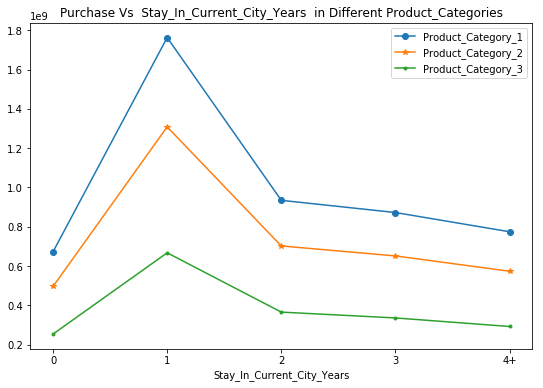

In [31]:
fig=plt.figure(figsize=(9,6));
ax=fig.add_subplot(1,1,1)
ticks=ax.set_xticklabels(['0','1','2','3','4+'])
ax.set_title("Purchase Vs  Stay_In_Current_City_Years  in Different Product_Categories")
ax.set_xlabel('Stay_In_Current_City_Years')
ax.legend(loc='best')
ax.plot(bf_S1,marker='o')
ax.plot(bf_S2,marker='*')
ax.plot(bf_S3,marker='.')
ax.legend(['Product_Category_1','Product_Category_2','Product_Category_3'])

<font size=4 face="宋体">可见，在居住时间为1年前，随着居住时间的上升，对三种产品类型的需求也上升；<p>在居住时间为1年后，随着居住时间为1年的上升，对三种产品类型的需求也逐步下降。
<p>这也和 “年龄与产品类型需求图”相对应，居住1年的多为刚安定下来有较强购买需要的青中年

### 4.4 性别、婚姻状况与产品类型

In [ ]:
## 二次探索数据
# 哪种类型的产品对于男性和女性（未婚、已婚）来说，需求量更大?

In [93]:
bf_gen_mar_sum1 = bf.groupby(['Gender','Marital_Status'])['Purchase'].sum().reset_index('Marital_Status')
bf_gen_mar_sum2 = bf[bf["Product_Category_2"]>0]
bf_gen_mar_sum2 = bf_gen_mar_sum2.groupby(['Gender','Marital_Status'])['Purchase'].sum().reset_index('Marital_Status')
bf_gen_mar_sum3 = bf[bf["Product_Category_3"]>0]
bf_gen_mar_sum3 = bf_gen_mar_sum3.groupby(['Gender','Marital_Status'])['Purchase'].sum().reset_index('Marital_Status')

In [101]:
# 拼接数据框
bf_gen_mar_sum = pd.concat([bf_gen_mar_sum1,bf_gen_mar_sum2,bf_gen_mar_sum3],axis=1)
bf_gen_mar_sum = bf_gen_mar_sum.drop(['Marital_Status'], axis=1)
bf_gen_mar_sum.index=['Female_0','Female_1','Male_0','Male_1']
bf_gen_mar_sum.columns=['Product_Category_1','Product_Category_2','Product_Category_3']

bf_gen_mar_sum

,Product_Category_1,Product_Category_2,Product_Category_3
Female_0,673815717,490531140,239137309
Female_1,490808304,351631803,170432466
Male_0,2292473783,1729333948,903950203
Male_1,1560570574,1161071553,602126057


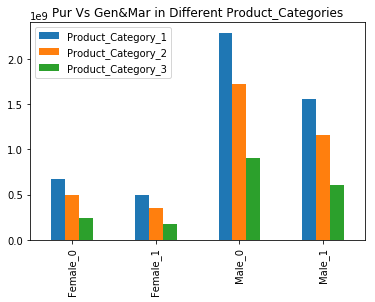

In [102]:
bf_gen_mar_sum.plot(kind='bar',title="Pur Vs Gen&Mar in Different Product_Categories")

<font size=4 face="宋体">可见， 按性别和婚姻状态分类的各群体，对三种产品的偏好为：Product_Category_1 > Product_Category_2 > Product_Category_3
<p>由此可推测出，Product_Category_1应为必需品或拥有接近于必需品的属性，而 Product_Category_3则是接近于奢侈品或非必需品的类别
<p>其中，还可以看出已婚女性的购买量最少，很有可能是其丈夫一起结账了。

### 4.5 城市与产品类型

In [104]:
## 二次探索数据
# 不同城市对不同产品的需求

In [155]:
bf1_city_sum1 = bf1.groupby(['City_Category'])['Product_Category_1'].sum()
bf1_city_sum2 = bf1.groupby(['City_Category'])['Product_Category_2'].sum()
bf1_city_sum3 = bf1.groupby(['City_Category'])['Product_Category_3'].sum()
bf1_city_sum1 

City_Category
A    1.483304e+22
B    2.315329e+22
C    1.954418e+22
Name: Product_Category_1, dtype: float64

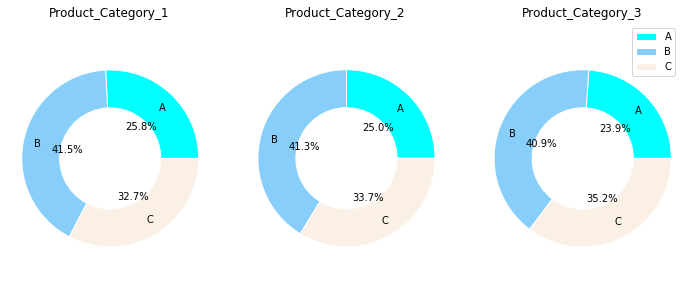

In [157]:
fig=plt.figure(figsize=(12,5));
# 图形位置与标题
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)
ax1.set_title('Product_Category_1')
ax2.set_title('Product_Category_2')
ax3.set_title('Product_Category_3')
# 作图
ax1.pie(bf1_city_sum1,radius=0.7,wedgeprops=dict(width=0.3,edgecolor='w'),colors=['cyan','lightskyblue','linen','yellow'],labels=['A','B','C'],labeldistance = 0.8,autopct='%1.1f%%',pctdistance = 0.5)
ax2.pie(bf1_city_sum2,radius=0.7,wedgeprops=dict(width=0.3,edgecolor='w'),colors=['cyan','lightskyblue','linen','yellow'],labels=['A','B','C'],labeldistance = 0.8,autopct='%1.1f%%',pctdistance = 0.5)
ax3.pie(bf1_city_sum3,radius=0.7,wedgeprops=dict(width=0.3,edgecolor='w'),colors=['cyan','lightskyblue','linen','yellow'],labels=['A','B','C'],labeldistance = 0.8,autopct='%1.1f%%',pctdistance = 0.5)
# 正圆与图例
ax1.axis('equal')
ax2.axis('equal')
ax3.axis('equal')
ax3.legend(['A','B','C'])

<font size=4 face="宋体">由上图可见, 三座城市分别对三种产品类型的需求大致相同，说明B城的购买力旺盛，是最大的购买力来源

<font size=4 face="宋体">下面，分析各城的人口年龄组成

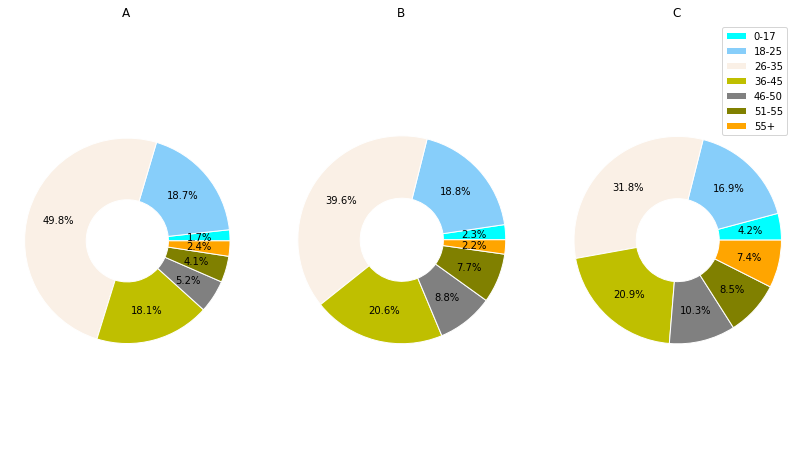

In [214]:
bf_C = bf.groupby(['City_Category','Age']).count().reset_index('Age')

fig=plt.figure(figsize=(14,8));
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)
ax1.set_title('A')
ax2.set_title('B')
ax3.set_title('C')

ax1.pie(bf_C.iloc[0:7,2],radius=0.5,wedgeprops=dict(width=0.3,edgecolor='w'),colors=['cyan','lightskyblue','linen','y','grey','olive','orange'],autopct='%1.1f%%',pctdistance = 0.7)
ax2.pie(bf_C.iloc[7:14,2],radius=0.5,wedgeprops=dict(width=0.3,edgecolor='w'),colors=['cyan','lightskyblue','linen','y','grey','olive','orange'],autopct='%1.1f%%',pctdistance = 0.7)
ax3.pie(bf_C.iloc[14:23,2],radius=0.5,wedgeprops=dict(width=0.3,edgecolor='w'),colors=['cyan','lightskyblue','linen','y','grey','olive','orange'],autopct='%1.1f%%',pctdistance = 0.7)

ax1.axis('equal')
ax2.axis('equal')
ax3.axis('equal')
ax3.legend(['0-17','18-25','26-35','36-45','46-50','51-55' ,'55+'],loc="best")

<font size=4 face="宋体">可见，A城接近50%是26-35的群体，18-45岁群体达86.6%，但是A城的购买力却是最低的，说明A城是一个很年轻的城市，经济实力不是很强，但具有十分大的发展和消费潜力
<p>B城是一个比较健壮的城市，购买力旺盛，青壮年占人口的主要；
<p>C城则是接近老龄化的城市，46岁以上人口占26.2，考虑到其0-17岁群体占4.2%，三者中最高，婴幼儿用品及少年书籍等需求较高，所以购买力位居第二。

<font size=4 face="宋体">该环形图更清晰地向我们展示了各个城市间的人口构成

Text(0.5,1,'Gender & Marital_Status')

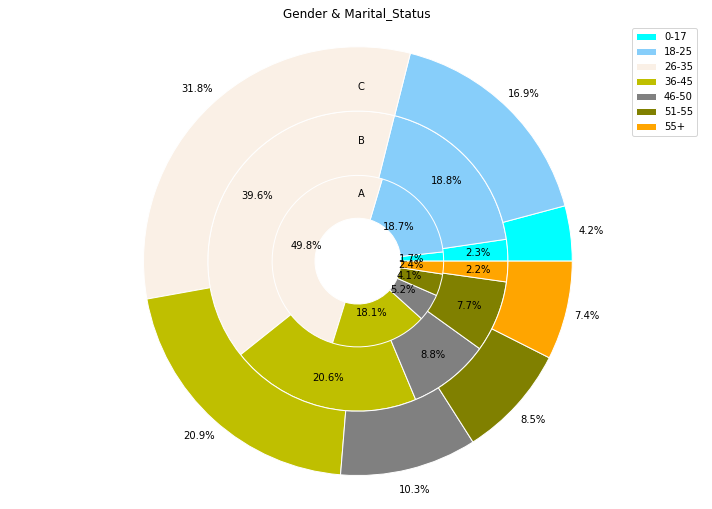

In [242]:
plt.figure(figsize=(10,7))
plt.pie(bf_C.iloc[0:7,2],radius=0.5,wedgeprops=dict(width=0.3,edgecolor='w'),colors=['cyan','lightskyblue','linen','y','grey','olive','orange'],autopct='%1.1f%%',pctdistance = 0.5)
plt.pie(bf_C.iloc[7:14,2],radius=0.7,wedgeprops=dict(width=0.3,edgecolor='w'),colors=['cyan','lightskyblue','linen','y','grey','olive','orange'],autopct='%1.1f%%',pctdistance = 0.8)
plt.pie(bf_C.iloc[14:23,2],radius=1,wedgeprops=dict(width=0.3,edgecolor='w'),colors=['cyan','lightskyblue','linen','y','grey','olive','orange'],autopct='%1.1f%%',pctdistance = 1.1)
plt.text(0,0.8,"C")
plt.text(0,0.55,"B")
plt.text(0,0.3,"A")
plt.tight_layout()
plt.legend(['0-17','18-25','26-35','36-45','46-50','51-55' ,'55+'],loc="best")
plt.axis('equal')
plt.title('Gender & Marital_Status')

## 5.随机森林模型

In [245]:
# 接下来，将使用随机森林对不同人群对不同产品的购买行为进行预测

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

### 5.1 特征工程

In [7]:
# 分别将 User_ID 和 Product_ID 的不同的字符的离散属性值，用整数表示
le_UID = LabelEncoder()
bf['User_ID'] = le_UID.fit_transform(bf['User_ID'])
le_PID = LabelEncoder()
bf['Product_ID'] = le_PID.fit_transform(bf['Product_ID'])

# 将性别转化为数字表示， Female: 0；Male: 1
bf['Gender'] = np.where(bf['Gender']=='M',1,0) 
# 对年龄、居住城市、居住时间进行one-hot编码
bf_Age = pd.get_dummies(bf.Age)
bf_CC = pd.get_dummies(bf.City_Category)
bf_SICY = pd.get_dummies(bf.Stay_In_Current_City_Years)

#替换 bf 中对应的列
bf_encoded = pd.concat([bf,bf_Age,bf_CC,bf_SICY],axis=1)
bf_encoded.drop(['Age','City_Category','Stay_In_Current_City_Years'],axis=1,inplace=True)

In [265]:
bf_encoded.head(5)

,User_ID,Product_ID,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,0-17,...,51-55,55+,A,B,C,0,1,2,3,4+
0,0,670,0,10,0,3,0.0,0.0,8370,1,...,0,0,1,0,0,0,0,1,0,0
1,0,2374,0,10,0,1,6.0,14.0,15200,1,...,0,0,1,0,0,0,0,1,0,0
2,0,850,0,10,0,12,0.0,0.0,1422,1,...,0,0,1,0,0,0,0,1,0,0
3,0,826,0,10,0,12,14.0,0.0,1057,1,...,0,0,1,0,0,0,0,1,0,0
4,1,2732,1,16,0,8,0.0,0.0,7969,0,...,0,1,0,0,1,0,0,0,0,1


### 5.2 模型训练

#### 5.2.1 提取小数据集

In [8]:
# 提取 1/50 训练模型
df_frac =bf_encoded.sample(frac=0.02,random_state=100)
X = df_frac.drop(['Purchase'], axis=1)
y = df_frac['Purchase']

# train_test_split函数用于将矩阵随机划分为训练子集和测试子集，并返回划分好的训练集测试集样本和训练集测试集标签
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=100)

#针对每一个特征维度,进行去均值和方差归一化
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 5.2.2 GridSearchCV与参数优化

In [ ]:
# GridSearchCV与参数选择
# 1.迭代次数n_estimators
# 2.最小样本数min_samples_split
# 3.叶子节点最少样本数min_samples_leaf 
# 4.最大特征数max_features

##### 1.迭代次数 n_estimators

Best parameter: {'n_estimators': 110}
Best score: 2988.92


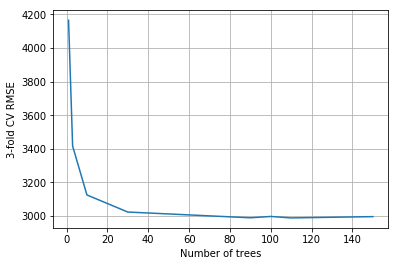

In [60]:
# 1.迭代次数（n_estimators）
# 交叉验证cv:默认=3，评分函数scoring：neg_mean_squared_error
param_test1 = {'n_estimators':[1,3,10,30,90,100,110,150]}
#param_test1 = {'n_estimators':[1,3,10,30,90,100,110,150,300]}
#param_test1 = {'n_estimators':[1,3,10,30,90,100,110,150,300,330]}
grid_rf = GridSearchCV(RandomForestRegressor(),param_grid=param_test1,cv=3,scoring='neg_mean_squared_error').fit(X_train_scaled,y_train)
# 画出 交叉验证的 均方根误差 (RMSE)得分
plt.figure()
plt.plot(list(param_test1.values())[0],(-1*grid_rf.cv_results_['mean_test_score'])**0.5)
plt.xlabel('Number of trees')
plt.grid() 
plt.ylabel('3-fold CV RMSE')
print('Best parameter: {}'.format(grid_rf.best_params_))
print('Best score: {:.2f}'.format((-1*grid_rf.best_score_)**0.5))

Best parameter: {'n_estimators': 150}
Best score: 2986.81


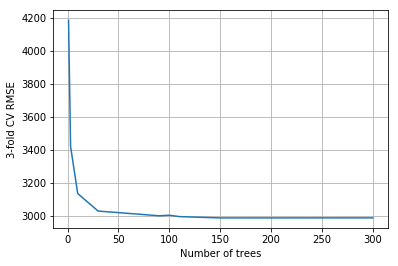

In [61]:
#param_test1 = {'n_estimators':[1,3,10,30,90,100,110,150,300]}

Best parameter: {'n_estimators': 300}
Best score: 2988.32


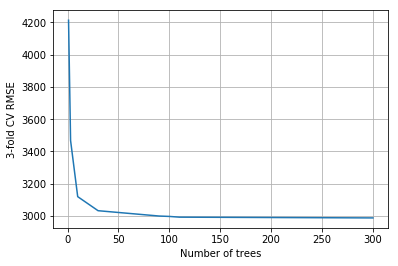

In [292]:
#param_test1 = {'n_estimators':[1,3,10,30,90,100,110,150,300]}

Best parameter: {'n_estimators': 330}
Best score: 2983.16


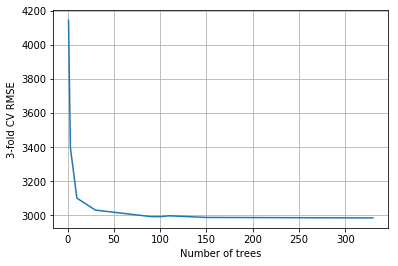

In [293]:
#param_test1 = {'n_estimators':[1,3,10,30,90,100,110,150,300,330]}

<font size=4 face="宋体">可见，n_estimators在100后逐渐稳定在3000附近，继续提高迭代次数，并未能获得更大程度上较佳效果的RMSE,且耗费近3倍时间成本，故n_estimators=110。

###### 2.最小样本数 min_samples_split 和 叶子节点最少样本数 min_samples_leaf  参数选择

In [15]:
# 2.最小样本数min_samples_split 和 叶子节点最少样本数min_samples_leaf  参数选择
# param_test2 = {'n_estimators':[1,3,10,30,100,150,300,330],'max_depth':[1,3,5,7,9]}
param_test2= {'max_depth':range(3,14,2), 'min_samples_split':range(30,201,20)}
grid_rf = GridSearchCV(RandomForestRegressor(n_estimators=110),param_grid=param_test2,cv=3,scoring='neg_mean_squared_error').fit(X_train_scaled,y_train)

In [16]:
#param_test2= {'max_depth':range(3,14,2), 'min_samples_split':range(30,201,20)}
print('Best parameter: {}'.format(grid_rf.best_params_))
print('Best score: {:.2f}'.format((-1*grid_rf.best_score_)**0.5))

Best parameter: {'max_depth': 13, 'min_samples_split': 50}
Best score: 2954.16


<font size=4 face="宋体">于是，max_depth=13, min_samples_split=50

##### 3.最大特征数 max_features

In [324]:
# # 3.最大特征数max_features
param_test3= {'max_features':range(1,23,1)}  
grid_rf = GridSearchCV(RandomForestRegressor(n_estimators=110,max_depth=13, min_samples_split=50),param_grid = param_test3,cv=3,scoring='neg_mean_squared_error').fit(X_train_scaled,y_train)
print('Best parameter: {}'.format(grid_rf.best_params_))
print('Best score: {:.2f}'.format((-1*grid_rf.best_score_)**0.5))

Best parameter: {'max_features': 21}
Best score: 2961.25


<font size=4 face="宋体">限定最大特征数，并未能有效降低RMSE,故不设置max_features。
<p>故，n_estimators=110,max_depth=13, min_samples_split=50

## 6.学习曲线

In [9]:
#对于不同大小的训练集，确定训练和测试的分数
train_sizes, train_scores, test_scores = learning_curve(RandomForestRegressor(max_depth=13, min_samples_split=50,n_estimators=110), X_train_scaled, y_train, cv=3, scoring='neg_mean_squared_error')

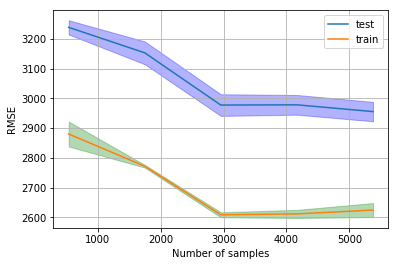

In [10]:
#均值归一化
train_scores = (-1*train_scores)**0.5
test_scores = (-1*test_scores)**0.5
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
# 画出得分曲线
plt.figure()
plt.plot(train_sizes,test_scores_mean,label='test')
plt.plot(train_sizes,train_scores_mean,label='train')
# 波动范围：[平均值-标准差,平均值+标准差]
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.3,color="g")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.3, color="b")
plt.grid()
plt.xlabel('Number of samples')
plt.ylabel('RMSE')
plt.legend()

<font size=4 face="宋体">可见，随着样本数量增加，训练集和测试集的 RMSE 都稳步减少，训练集稳定在2600左右，测试集有继续减小的趋势。

## 7.整体数据集训练

In [11]:
X = bf_encoded.drop(['Purchase'], axis=1)
y = bf_encoded['Purchase']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=100)
#标准化
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
#整个数据集输入到模型中
rf = RandomForestRegressor(max_depth=13, min_samples_split=50,n_estimators=110).fit(X_train_scaled,y_train)
y_predicted = rf.predict(X_test_scaled)
print('Test set RMSE: {:.3f}'.format(mean_squared_error(y_test,y_predicted)**0.5))

Test set RMSE: 2747.033


<font size=4 face="宋体">测试集的 RMSE 下降到2747.033，比一开始下降了约200，说明模型具有较好的性能